In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

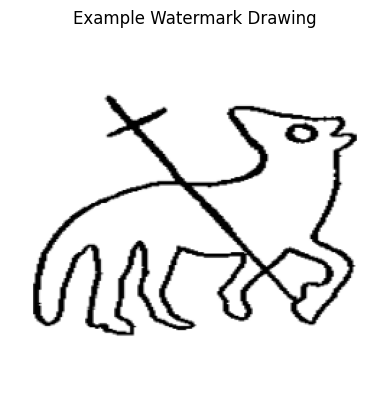

In [2]:
template = cv2.imread('./Data Shape Comparison/briquet_engraving/briquet_1.png')
template_img = template
plt.axis('off')
plt.imshow(template)
plt.title('Example Watermark Drawing')
plt.show()

In [3]:
template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

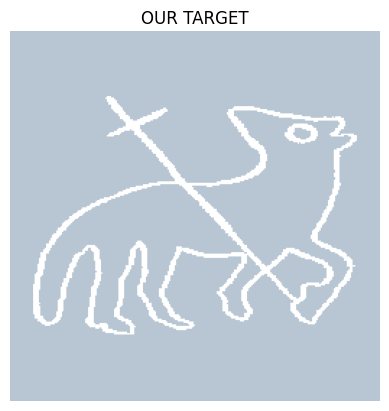

In [16]:
target = cv2.imread('./Data Shape Comparison/briquet_synthetic/briquet_1.png')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(target)
plt.title('OUR TARGET')
plt.show()

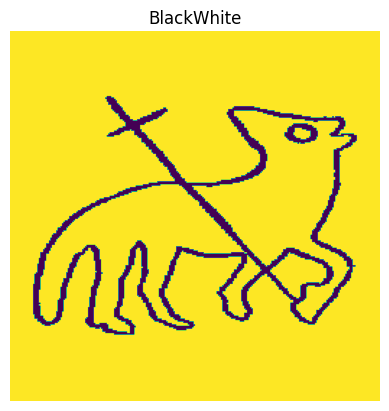

In [18]:
(thresh, target_gray) = cv2.threshold(target_gray, 0, 255, cv2.THRESH_BINARY)
invert = cv2.bitwise_not(target_gray)
plt.axis('off')
plt.imshow(target_gray)
plt.title('BlackWhite')
plt.show()

In [19]:
ret,thresh1 = cv2.threshold(template,127,255,0)
ret,thresh2 = cv2.threshold(target_gray,127,255,0)

In [20]:
contours,hierarchy = cv2.findContours(thresh1,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

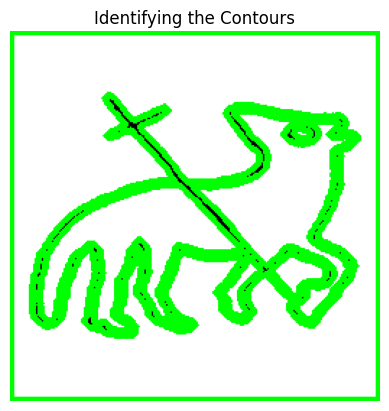

In [21]:
cv2.drawContours(template_img,contours,-1,(0,255,0),3)
plt.axis('off')
plt.imshow(template_img)
plt.title('Identifying the Contours')
plt.show()

In [23]:
#SORT THE CONTOURS BY AREA
# doing this so we can remove the largest  contour which is the image outline

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

#extract the second largest contour which is the shape only
template_contour = sorted_contours[1]

In [24]:
contours,hierarchy = cv2.findContours(thresh2,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

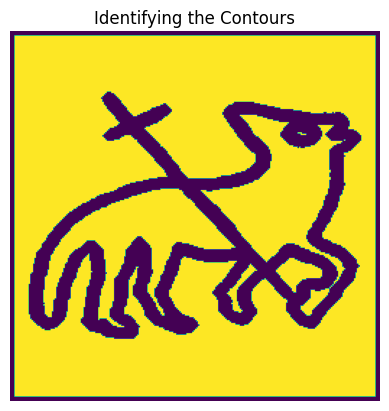

In [25]:
cv2.drawContours(target_gray,contours,-1,(0,255,0),3)
plt.axis('off')
plt.imshow(target_gray)
plt.title('Identifying the Contours')
plt.show()

In [26]:
for c in contours:
    match = cv2.matchShapes(template_contour,c,3,0.0)
    print(match)
    #valid matches would be less than 0.15
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = []

1.8991010433484183
0.3733849263953693
0.23913547692833143
0.4656152772356106
0.2052783296770803
0.8068701466579504
0.34490048209077195
0.0


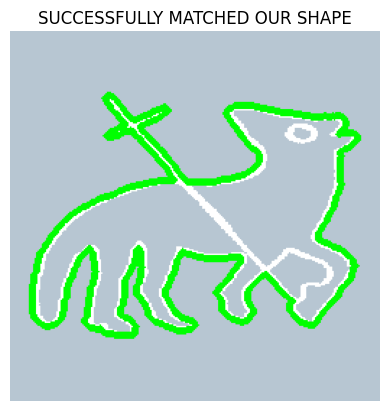

In [27]:
cv2.drawContours(target,[closest_contour],-1,(0,255,0),3)
plt.axis('off')
plt.imshow(target)
plt.title('SUCCESSFULLY MATCHED OUR SHAPE')
plt.show()